### **This notebook uses the outputs of the `inference` mode of `sade`. For score-norm outputs saved via `eval` mode, refer to the `down_syndrome_scorenorm_som` notebook**

In [1]:
# %pip install holoviews hvplot -q
# !cd /codespace/ && git clone https://github.com/ahsanMah/simpsom
# !cd /codespace/simpsom && python setup.py install --user

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

workdir = "/ASD/ahsan_projects/braintypicality/workdir/cuda_opt/learnable/experiments/reprod-correct/"
%ls $workdir

abcd-test/   conte/     ibis-asd/       ibis-hr-inliers/
abcd-val/    ebds/      ibis-atypical/  ibis-inlier/
config.json  ebds-ood/  ibis-ds-sa/     model_states.json


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
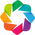

In [3]:
import glob
import re
import holoviews as hv
from holoviews import opts
from holoviews import dim

hv.extension("bokeh")

In [4]:
import hvplot.pandas
import cupy
import simpsom as sps
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from bokeh.plotting import figure, output_file, show, save
from bokeh.util.hex import axial_to_cartesian, cartesian_to_axial
from bokeh.transform import linear_cmap, factor_cmap, factor_mark, log_cmap, jitter
from bokeh.models import ColumnDataSource, CDSView, BooleanFilter, GroupFilter, IndexFilter, Legend
from bokeh.models import ColorBar, FixedTicker
from bokeh.palettes import Spectral5, Accent5, Spectral10
from collections import OrderedDict, Counter

import colorcet as cc
from colorcet.plotting import swatch, swatches
from bokeh.layouts import row, column

scale = lambda x,a,b: (b-a)*(x-min(x))/(max(x)-min(x)) + a  
mpl.rcParams['lines.markersize'] = 3

%matplotlib inline

In [5]:
# from sade.datasets.loaders import get_image_files_list
extract_id = lambda f: re.match("(.*)(.nii.gz|.npz)", os.path.basename(f)).group(1)

In [6]:
# Some plotting defaults

# Change this for higher resolution plots
SCALE_FACTOR = 1

HEXSIZE = 0.99 / np.sqrt(3)
background_fill_color = "#fafafa"
header_text_size = "18px"
MARKER_SIZE = 13


def plot_hex_heatmap(
    scattersource,
    binsource,
    heatmap_col="distance",
    cmap_upper_ratio=1.02,
    cmap_lower_ratio=1,
    width=800,
    height=700,
    cmap="Greys256",
    cbar_ticks=True,
    scatter_jitter=True,
    filter_groups=[],
):

    heatmap_min, heatmap_max = min(binsource.data[heatmap_col]), max(
        binsource.data[heatmap_col]
    )

    plot = figure(
        width=int(width * SCALE_FACTOR),
        height=int(height * SCALE_FACTOR),
        background_fill_color=background_fill_color,
        active_scroll="wheel_zoom",
    )
    r = plot.hex_tile(
        source=binsource,
        color="darkgray",
        fill_color=linear_cmap(
            heatmap_col,
            cmap,
            low=cmap_lower_ratio * heatmap_min,
            high=cmap_upper_ratio * heatmap_max,
        ),
        alpha=0.8,
    )

    if cbar_ticks:
        cbar_font_size = f"{12*SCALE_FACTOR}pt"
        cbar_tick_color = "black"
    else:
        cbar_font_size = "0pt"
        cbar_tick_color = None

    tick_values = np.arange(1, 6)
    tick_offset = 0.04  # Adjust based on how much offset you need
    offset_tick_values = [tick + tick_offset for tick in tick_values]
    tick_labels = {k: str(int(k)) for k in offset_tick_values}

    color_bar = r.construct_color_bar(
        padding=1,
        title="Percentage of Typicals",
        title_text_font_size=f"{18*SCALE_FACTOR}px",
        major_label_text_font_size=cbar_font_size,
        major_tick_line_color=cbar_tick_color,
        ticker=FixedTicker(ticks=offset_tick_values),
        major_tick_line_width=2 * SCALE_FACTOR,
    )
    color_bar.major_label_overrides = tick_labels
    plot.add_layout(color_bar, "right")

    group_filter = BooleanFilter(
        [c not in filter_groups for c in scattersource.data["dataset"]]
    )
    view = CDSView(filter=group_filter)
    #     view1 = CDSView(filter=GroupFilter(column_name='dataset', group='HR-Typical'))

    plot.scatter(
        source=scattersource,
        marker=factor_mark("dataset", MARKERS, DATASETS),
        color="color",
        x=jitter("x", 0.8) if scatter_jitter else "x",
        y=jitter("y", 0.8) if scatter_jitter else "y",
        size="scale" if "scale" in scattersource.data else MARKER_SIZE * SCALE_FACTOR,
        legend_group="dataset",
        alpha=0.9,
        line_color="black",
        view=view,
    )

    legend = Legend(
        items=plot.legend.items,
        location="top_right",
        orientation="horizontal",
        title="Dataset",
        title_text_font_size=f"{int(14*SCALE_FACTOR)}px",
        background_fill_color=background_fill_color,
        label_text_font_size=f"{int(13*SCALE_FACTOR)}px",
        glyph_height=int(32 * SCALE_FACTOR),
        glyph_width=int(32 * SCALE_FACTOR),
    )

    # Remove original legend
    plot.legend.destroy()
    plot.add_layout(legend, "above")

    plot.axis.visible = False
    plot.grid.visible = False

    return plot

In [7]:
def build_bmu_df(net, test_data, test_labels, min_cluster_size_ratio=0.1):

    bmus_arr = net.find_bmu_ix(cupy.asarray(test_data)).get()
    bmu_dists = [
        np.linalg.norm(net.nodes_list[bmuidx].weights - x)
        for bmuidx, x in zip(bmus_arr, test_data)
    ]

    bmus = pd.DataFrame([b.item() for b in bmus_arr], columns=["BMU"])
    bmus["dataset"] = [dataset_id_to_name[i] for i in test_labels]
    bmus["bmu-distance"] = bmu_dists
    bmu_df = bmus.set_index("BMU")

    for idx in bmu_df.index:
        node = net.nodes_list[idx]
        bmu_df.loc[idx, ["x", "y"]] = node.pos.get()

    bmucounts = (
        bmus[["BMU", "dataset"]]
        .groupby(["BMU"])
        .value_counts()
        .reset_index(level=-1, name="count")
    )
    bmudists = bmus[["BMU", "bmu-distance"]].groupby(["BMU"]).mean()
    bmudists_median = bmus[["BMU", "bmu-distance"]].groupby(["BMU"]).median()

    for idx in bmucounts.index:
        node = net.nodes_list[idx]
        bmucounts.loc[idx, ["x", "y"]] = node.pos.get()
        bmucounts.loc[idx, "neighbourhood-distance"] = node.difference
        bmucounts.loc[idx, "mean-matching-distance"] = bmudists.loc[idx, "bmu-distance"]
        bmucounts.loc[idx, "mean-matching-distance"] = bmudists.loc[idx, "bmu-distance"]

    significant_bmus = []
    dataset_counts = bmus["dataset"].value_counts()

    for name, g in bmucounts.groupby("dataset"):
        cohort_count = dataset_counts[name]
        min_cohort_count = int(min_cluster_size_ratio * cohort_count)
        significant_bmus.append(g[g["count"] >= min_cohort_count])

    significant_bmus = pd.concat(significant_bmus).sort_values("count", ascending=False)

    return bmu_df, significant_bmus

In [8]:
def build_hexbin_source(net, train_data, bmu_df, significant_bmus):
    _x, _y = bmu_df.x, bmu_df.y
    _q, _r = cartesian_to_axial(
        _x, _y, size=HEXSIZE, orientation="pointytop", aspect_scale=1
    )
    _sx, _sy = axial_to_cartesian(_q, _r, size=1, orientation="pointytop")

    scattersource = ColumnDataSource(
        dict(
            x=_sx,
            y=_sy,
            dataset=bmu_df["dataset"],
            color=[color_dict[d] for d in bmu_df["dataset"]],
        )
    )

    bmu_density = net.find_bmu_ix(cupy.asarray(train_data)).get()
    bmu_density = Counter(bmu_density)

    x, y, distance, sample_count, density = [], [], [], [], []
    binned_density = []
    for idx, n in enumerate(net.nodes_list):
        x.append(n.pos[0].get())
        y.append(n.pos[1].get())
        distance.append(n.difference)
        c = bmu_density.get(idx, 1e-5)
        d = 100 * c / len(train_data)
        density.append(d)
        binned_density.append(np.ceil(d) if d > 1e-5 else 0)

        # add an average of matching distances? tain distances or test distances?

    # This defines the datapoints for the heatmap background
    x, y, distance = np.asarray(x), np.asarray(y), np.asarray(distance)
    q, r = cartesian_to_axial(x, y, size=HEXSIZE, orientation="pointytop")
    binsource = ColumnDataSource(
        dict(
            q=q, r=r, distance=distance, density=density, binned_density=binned_density
        )
    )

    # This defines the source of the scatter plots of test samples
    # to be overlayed on the heatmap
    _x, _y = bmu_df.x, bmu_df.y
    _q, _r = cartesian_to_axial(
        _x, _y, size=HEXSIZE, orientation="pointytop", aspect_scale=1
    )
    sx, sy = axial_to_cartesian(_q, _r, size=1, orientation="pointytop")
    scattersource = ColumnDataSource(
        dict(
            x=_sx,
            y=_sy,
            dataset=bmu_df["dataset"],
            color=[color_dict[d] for d in bmu_df["dataset"]],
        )
    )

    # Optionally we can plot only the significant nodes (i.e nodes w/ >= 10% of the dataset)
    x = significant_bmus.x
    y = significant_bmus.y
    dataset = significant_bmus["dataset"]
    count = significant_bmus["count"]
    q, r = cartesian_to_axial(
        x, y, size=HEXSIZE, orientation="pointytop", aspect_scale=1
    )
    sx, sy = axial_to_cartesian(q, r, size=1, orientation="pointytop")
    significantsource = ColumnDataSource(
        dict(
            x=sx,
            y=sy,
            dataset=dataset,
            color=[color_dict[d] for d in dataset],
            scale=scale(significant_bmus["count"], 10, 50),
        )
    )

    return binsource, scattersource, significantsource

In [9]:
def build_dataset(dataset_list, inlier_cutoff_idx):

    X_data = np.concatenate(dataset_list, axis=0)
    y_labels = np.concatenate([[i] * len(d) for i, d in enumerate(dataset_list)])
    assert len(y_labels) == len(X_data)

    mu, std = np.mean(X_data[y_labels <= inlier_cutoff_idx], axis=0), np.std(
        X_data[y_labels <= 0], axis=0
    )
    X_data = (X_data - mu) / std

    train_data = X_data[y_labels <= inlier_cutoff_idx]
    train_labels = y_labels[y_labels <= inlier_cutoff_idx]

    test_data = X_data[y_labels > inlier_cutoff_idx]
    test_labels = y_labels[y_labels > inlier_cutoff_idx]

    return (train_data, train_labels), (test_data, test_labels)

In [10]:
abcd_data = []
for c in ["abcd-test", "abcd-val"]:
    for f in glob.glob(f"{workdir}/{c}/*"):
        with np.load(f) as data:
            abcd_data.append(data["score_norms"])

abcd_data = np.concatenate(abcd_data, axis=0)

abcd_data.shape

(330, 20)

In [11]:
ibis_typical = []
for f in glob.glob(f"{workdir}/ibis-inlier/*"):
    with np.load(f) as data:
        ibis_typical.append(data["score_norms"])

ibis_typical = np.concatenate(ibis_typical, axis=0)
ibis_typical.shape

(82, 20)

In [12]:
ibis_ds = []
ibis_ds_fnames = []
for f in glob.glob(f"{workdir}/ibis-ds-sa/*"):
    ibis_ds_fnames.append(f)
    with np.load(f) as data:
        ibis_ds.append(data["score_norms"])

ibis_ds = np.concatenate(ibis_ds, axis=0)
ibis_ds.shape

(28, 20)

In [13]:
ibis_asd = []
ibis_asd_fnames = []
for f in glob.glob(f"{workdir}/ibis-asd/*"):
    ibis_asd_fnames.append(f)
    with np.load(f) as data:
        ibis_asd.append(data["score_norms"])

ibis_asd = np.concatenate(ibis_asd, axis=0)
ibis_asd.shape

(65, 20)

In [14]:
ibis_hr_typical = []
for f in glob.glob(f"{workdir}/ibis-hr-inliers/*"):
    with np.load(f) as data:
        ibis_hr_typical.append(data["score_norms"])

ibis_hr_typical = np.concatenate(ibis_hr_typical, axis=0)
ibis_hr_typical.shape

(106, 20)

In [15]:
ebds = []
ebds_fnames = []
for f in glob.glob(f"{workdir}/ebds/*"):
    ebds_fnames.append(f)
    with np.load(f) as data:
        ebds.append(data["score_norms"])

ebds = np.concatenate(ebds, axis=0)
ebds.shape

(93, 20)

In [16]:
ebds_ood = []
ebds_ood_fnames = []
for f in glob.glob(f"{workdir}/ebds-ood/*"):
    ebds_ood_fnames.append(f)
    with np.load(f) as data:
        ebds_ood.append(data["score_norms"])

ebds_ood = np.concatenate(ebds_ood, axis=0)
ebds_ood.shape

(24, 20)

In [17]:
print("ABCD-to-IBIS ratio:", len(abcd_data) / len(ibis_typical))

ABCD-to-IBIS ratio: 4.024390243902439


In [18]:
datasets = OrderedDict(
    {
        # First we place inliers
        "ABCD": abcd_data,
        "IBIS-Typical": ibis_typical,
        "IBIS-HR-Typical": ibis_hr_typical,
        "EBDS-Inlier": ebds,
        # Then we place outliers
        "Down Syndrome": ibis_ds,
        "IBIS-ASD": ibis_asd,
        "EBDS-Outlier": ebds_ood,
    }
)

marker_dict = OrderedDict(
    {
        "Down Syndrome": "triangle",
        "IBIS-ASD": "star",
        "IBIS-HR-Typical": "circle",
        "EBDS-Outlier": "inverted_triangle",
    }
)
DATASETS = list(marker_dict.keys())
MARKERS = list(marker_dict.values())
color_dict = OrderedDict(
    {
        "Down Syndrome": "#f03b20",  # red
        "IBIS-HR-Typical": "#7fc97f",  # green
        "IBIS-ASD": "#fdc076",  # orange
        "EBDS-Outlier": "green",
    }
)


dataset_id_to_name = {i: v for i, v in enumerate(datasets.keys())}
dataset_name_to_id = {v: k for k, v in dataset_id_to_name.items()}

dataset_list = [
    abcd_data,
    ibis_typical,
    ibis_hr_typical,
    ebds,
    ibis_ds,
    ibis_asd,
    ebds_ood,
]
(train_data, train_labels), (test_data, test_labels) = build_dataset(
    dataset_list, inlier_cutoff_idx=dataset_name_to_id["EBDS-Inlier"]
)

dssamples = test_data[test_labels == dataset_name_to_id["Down Syndrome"]]

train_data.shape, test_data.shape, dssamples.shape

((611, 20), (117, 20), (28, 20))

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(train_data)
print(
    pca.explained_variance_ratio_,
    pca.explained_variance_ratio_[0] / pca.explained_variance_ratio_[1],
)

num_neurons = 5 * np.sqrt(train_data.shape[0])
grid_size = int(np.ceil(np.sqrt(num_neurons)))

ratio = np.floor(pca.explained_variance_ratio_[0] / pca.explained_variance_ratio_[1])
h = np.ceil(np.sqrt(num_neurons / ratio))
w = h * ratio
print(f"Suggested minimum number of neurons: {int(num_neurons)}")
print(f"Suggested height and width: {int(h)}x{int(w)}")

[0.7254293  0.13698138 0.09117246 0.0313309  0.0068531 ] 5.295824
Suggested minimum number of neurons: 123
Suggested height and width: 5x25


2025-02-25 16:39:15.298 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2025-02-25 16:39:15.301 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2025-02-25 16:39:15.301 | WARNING  | simpsom.network:_set_weights:179 - Please make sure that the data have been standardized before using PCA.
2025-02-25 16:39:15.302 | INFO     | simpsom.network:_set_weights:181 - The weights will be initialized with PCA.
2025-02-25 16:39:15.390 | INFO     | simpsom.network:train:381 - The map will be trained with the batch algorithm.
2025-02-25 16:39:15.392 | INFO     | simpsom.network:train:403 - Early stop active.
2025-02-25 16:39:15.393 | WARNING  | simpsom.network:train:404 - Early stop is an experimental feature, make sure to know what you are doing!
2025-02-25 16:39:18.155 | INFO     | simpsom.network:plot_convergence:803 - Convergence results will be saved to:
/tmp/./som_convergence.png
2025-02-25 16:39:18.166 | INFO     | simpsom.network:get_nodes_diff

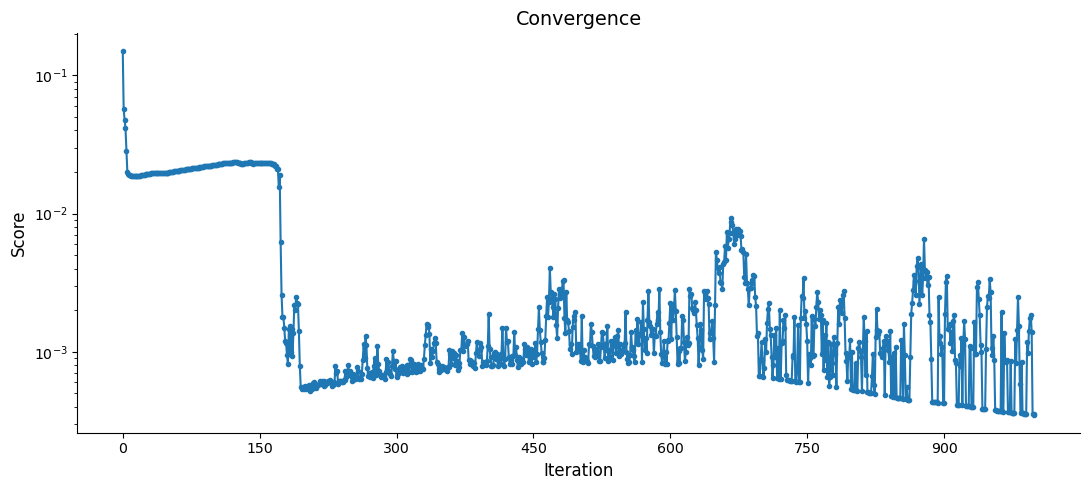

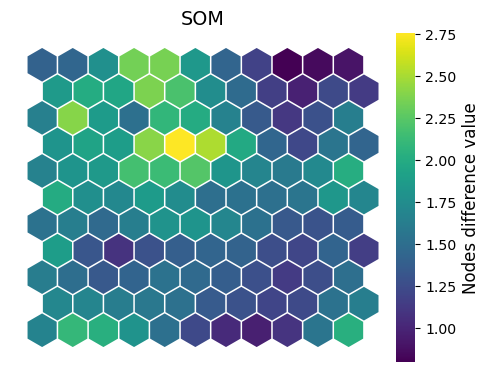

CPU times: user 3.39 s, sys: 1.37 s, total: 4.75 s
Wall time: 3.82 s


In [20]:
%%time
som_height, som_width = 11, 11
net = sps.SOMNet(som_height, som_width, train_data, topology='hexagonal', 
                init='PCA', metric='euclidean',
                neighborhood_fun='gaussian', PBC=True,
                random_seed=42, GPU=True, CUML=False,
                output_path="/tmp/")

net.train(train_algo='batch', start_learning_rate=0.1, epochs=1000, batch_size=-1,
           early_stop='mapdiff', early_stop_tolerance=1e-5, early_stop_patience=10
)
net.plot_convergence(figsize=(11, 5), logy=True)
net.get_nodes_difference()
net.plot_map_by_difference(show=True, print_out=False)

2025-02-25 16:39:18.819 | INFO     | simpsom.network:plot_convergence:803 - Convergence results will be saved to:
/tmp/./som_convergence.png


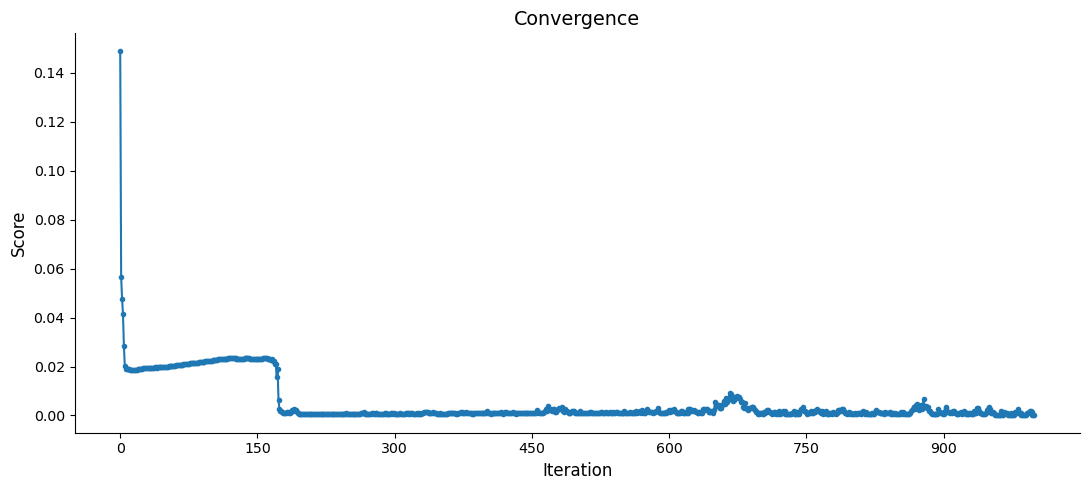

In [21]:
net.plot_convergence(
    figsize=(11, 5),
    logy=False,
)

In [22]:
bmus_arr = net.find_bmu_ix(cupy.asarray(dssamples)).get()
ibis_ds_IDs = [extract_id(f) for f in ibis_ds_fnames]
df = pd.DataFrame({"bmu": bmus_arr, "ID": ibis_ds_IDs})
df.head()

,bmu,ID
0,30,IBIS105477
1,30,IBIS110925
2,11,IBIS123451
3,30,IBIS146443
4,30,IBIS241887


### Uncomment the cell below to save the IDs

In [23]:
# df.to_csv(f'data/ds_prototypes_{som_height}x{som_width}.csv', index=None)

In [24]:
bmu_df, significant_bmus = build_bmu_df(
    net,
    test_data,
    test_labels,
    min_cluster_size_ratio=0.1,  # Select BMU that match >=10% of the data
)
significant_bmus

,dataset,count,x,y,neighbourhood-distance,mean-matching-distance
BMU,,,,,,
30,Down Syndrome,16,2.0,6.928203,1.863155,5.749036
71,IBIS-ASD,6,6.5,4.330127,1.531191,2.917103
55,EBDS-Outlier,4,5.0,0.000000,1.229335,2.110394
11,Down Syndrome,2,1.0,0.000000,2.101627,1.462361
32,Down Syndrome,2,2.0,8.660254,1.774890,0.890358
30,EBDS-Outlier,2,2.0,6.928203,1.863155,5.749036
44,EBDS-Outlier,2,4.0,0.000000,1.512009,1.569548
54,EBDS-Outlier,2,4.0,8.660254,2.351751,2.232406
60,EBDS-Outlier,2,5.5,4.330127,1.509200,2.538659


### Experimental plot

In [25]:
x = significant_bmus.x
y = significant_bmus.y
dataset = significant_bmus["dataset"]
count = significant_bmus["count"]

q, r = cartesian_to_axial(x, y, size=HEXSIZE, orientation="pointytop", aspect_scale=1)
sx, sy = axial_to_cartesian(q, r, size=1, orientation="pointytop")

hexsource = ColumnDataSource(
    dict(q=q, r=r, dataset=dataset, scale=scale(count, 0.1, 1.1))
)
scattersource = ColumnDataSource(dict(x=sx, y=sy, dataset=dataset, scale=count + 10))
group_filter = BooleanFilter([c != "LR-Typical" for c in dataset])
view = CDSView(filter=group_filter)

In [26]:
plot = figure(width=550, height=600)
renderer = plot.hex_tile(
    source=hexsource,
    view=view,
    color=factor_cmap("dataset", "Category10_7", DATASETS),
    scale="scale",
    legend_group="dataset",
    #     tool="wheel_zoom"
)

plot.legend.location = "top_left"
plot.legend.orientation = "horizontal"
# plot.legend.title = "Dataset"
show(plot)

In [27]:
binsource, scattersource, significantsource = build_hexbin_source(
    net, train_data, bmu_df, significant_bmus
)

In [28]:
distance_plot = plot_hex_heatmap(scattersource, binsource, cbar_ticks=False)
score_norm_density_plot = plot_hex_heatmap(
    scattersource,
    binsource,
    filter_groups=["IBIS-HR-Typical", "EBDS-Outlier"],
    heatmap_col="binned_density",
    cmap=cc.blues,
    cbar_ticks=True,
)

In [29]:
p = row(score_norm_density_plot, distance_plot)
show(p)

In [30]:
show(
    plot_hex_heatmap(
        significantsource,
        binsource,
        cbar_ticks=True,
        scatter_jitter=False,
        heatmap_col="binned_density",
        cmap=cc.blues,
        filter_groups=["IBIS-HR-Typical", "Down Syndrome"],
    )
)

In [31]:
show(
    plot_hex_heatmap(
        significantsource,
        binsource,
        heatmap_col="binned_density",
        filter_groups=["IBIS-HR-Typical", "EBDS-Outlier"],
        cbar_ticks=False,
        scatter_jitter=False,
    )
)
# save(score_norm_density_plot, filename="ds-som.html", title="Down Syndrome SOM")

In [32]:
# Image -> Network -> score-norms -> SOM ---> Gather **IDs** of samples matching prototype
#                 |__-> score-images(B, 20, H,W,D)
#                       | --> Likelihood Model -> Heatmaps (1, H,W,D)

# Correlation Analysis: Behavior Scores and Heatmaps

In [33]:
# p = swatch("coolwarm")
# p.title.text = "Title With Options"

In [34]:
color_dict["EBDS"] = "#ffff99"
color_dict["EBDS-Outlier"] = "red"

SCALE_FACTOR = 1
binsource, scattersource, significantsource = build_hexbin_source(
    net, train_data, bmu_df, significant_bmus
)
ebds_density_plot = plot_hex_heatmap(
    scattersource,
    binsource,
    heatmap_col="binned_density",
    filter_groups=["IBIS-ASD", "IBIS-HR-Typical", "Down Syndrome"],
    cmap=cc.blues,
    cbar_ticks=True,
    cmap_upper_ratio=0.999,
    cmap_lower_ratio=1.1e2,
)
show(ebds_density_plot)
# save(ebds_density_plot, filename="ebds.html", title="EBDS Plot")

In [35]:
SCALE_FACTOR = 1.2

color_dict["EBDS"] = "#ffff99"
color_dict["EBDS-Outlier"] = "red"

colors = ["#f1eef6", "#f0f9e8", "#a8ddb5", "#7bccc4", "#43a2ca", "#0868ac"]
binsource, scattersource, significantsource = build_hexbin_source(
    net, train_data, bmu_df, significant_bmus
)

ebds_density_plot = plot_hex_heatmap(
    scattersource,
    binsource,
    heatmap_col="binned_density",
    cmap=colors[1:],
    cbar_ticks=True,
    filter_groups=["Down Syndrome", "IBIS-HR-Typical", "IBIS-ASD"],
    cmap_upper_ratio=1.25,
    cmap_lower_ratio=0.9,
)

show(ebds_density_plot)